In [1]:
import requests
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
SHL_df1 = pd.read_csv(r'../Data/NSSCrisisv.1.csv', skiprows = [0, 1])
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
SHL_df1=SHL_df1.reset_index(drop=True)
SHL_df1

C:\Users\roryv\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17,23,27,28,29,35,54,66,68,69,70,72,80,82,85,88,105,106,107,108,128,140,143,145,146,148,152,153,154,155,157,158,159,160,161,162,163,164,165,168,169,170,171,172,181,182,183,184,185,186,188,189,190,191,192,194,195,196,197,198,200,201,204,205,263,265,266,273,281,286,287,288,303,310,311) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,PhoneWorkerName,WasRealCall,...,SUI AX Third-Party Risk Assessment Demographics - Income,SUI AX Third-Party Risk Assessment Demographics - SUI AX Does this risk assesment have different demographics than the caller? (Third-party Call),Suicide Assessment - Are you thinking of suicide?,Suicide Assessment - Caller is having thoughts of killing self or other,Suicide Assessment - Do you own a firearm?,Suicide Assessment - Have you ever attempted to kill yourself?,Suicide Assessment - Have you thought about suicide in the last two months?,Suicide Assessment - Suicide in progress?,Transfer Information - Were you transferred to this line from another crisis line or agency?,Transfer Information - Which line/agency transferred you to this Crisis Line?
0,96627022,Crisis,NaN,12/31/2021 23:35,12/31/2021 23:58,23,-1,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,96626934,Crisis,NaN,12/31/2021 23:29,12/31/2021 23:35,6,-1,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,96626654,Crisis,NaN,12/31/2021 23:07,12/31/2021 23:28,21,1030262,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96626370,Crisis,NaN,12/31/2021 22:45,12/31/2021 22:55,10,2479348,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,96625909,Crisis,NaN,12/31/2021 22:15,12/31/2021 22:44,29,-1,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52871,69492892,Crisis,NaN,1/1/2020 5:14,1/1/2020 5:28,14,1029822,101461,Rachel Bailey,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52872,69492741,Crisis,NaN,1/1/2020 4:45,1/1/2020 5:05,20,-1,101461,Rachel Bailey,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52873,69492019,Crisis,NaN,1/1/2020 3:00,1/1/2020 3:18,18,-1,101461,Rachel Bailey,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52874,69492070,Crisis,NaN,1/1/2020 1:45,1/1/2020 1:49,4,-1,101461,Rachel Bailey,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
SHL_df1.head(15)

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,PhoneWorkerName,WasRealCall,...,SUI AX Third-Party Risk Assessment Demographics - Income,SUI AX Third-Party Risk Assessment Demographics - SUI AX Does this risk assesment have different demographics than the caller? (Third-party Call),Suicide Assessment - Are you thinking of suicide?,Suicide Assessment - Caller is having thoughts of killing self or other,Suicide Assessment - Do you own a firearm?,Suicide Assessment - Have you ever attempted to kill yourself?,Suicide Assessment - Have you thought about suicide in the last two months?,Suicide Assessment - Suicide in progress?,Transfer Information - Were you transferred to this line from another crisis line or agency?,Transfer Information - Which line/agency transferred you to this Crisis Line?
0,96627022,Crisis,NaN,12/31/2021 23:35,12/31/2021 23:58,23,-1,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,96626934,Crisis,NaN,12/31/2021 23:29,12/31/2021 23:35,6,-1,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,96626654,Crisis,NaN,12/31/2021 23:07,12/31/2021 23:28,21,1030262,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96626370,Crisis,NaN,12/31/2021 22:45,12/31/2021 22:55,10,2479348,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,96625909,Crisis,NaN,12/31/2021 22:15,12/31/2021 22:44,29,-1,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,96625698,Crisis,NaN,12/31/2021 22:03,12/31/2021 22:15,12,-1,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,96625344,Crisis,NaN,12/31/2021 21:40,12/31/2021 22:01,21,2003009,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,96625140,Crisis,NaN,12/31/2021 21:27,12/31/2021 21:39,12,1033478,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,96625118,Crisis,NaN,12/31/2021 21:26,12/31/2021 21:27,1,-1,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,96624680,Crisis,NaN,12/31/2021 21:02,12/31/2021 21:23,21,4738962,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
SHL_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52876 entries, 0 to 52875
Columns: 312 entries, CallReportNum to Transfer Information - Which line/agency transferred you to this Crisis Line?
dtypes: float64(142), int64(6), object(164)
memory usage: 125.9+ MB


In [5]:
SHL_df2 = pd.read_csv(r'../Data/NSSCrisisv.2.csv', skiprows = [0, 1])
SHL_df2=SHL_df2.reset_index(drop=True)
SHL_df2

C:\Users\roryv\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (26,30,35,38,61,62,63,65,66,67,68,69,72,73,78,92,111,126,127,139,149,150,151,152,153,154,156,157,158,159,160,162,163,164,165,166,168,170,171,172,173,176,215,235,236,240,241,242) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,PhoneWorkerName,WasRealCall,...,SUI AX Phone Line - SAMHSA - Was the offer for follow-up accepted?,SUI AX Reassessment - Change in Risk Level,SUI AX Reassessment - Initial Suicide Risk Assessment,SUI AX Reassessment - Is this a Reassessment?,SUI AX Reassessment - Suicide Risk Re-assessment,SUI AX Third-Party Risk Assessment Demographics - Income,SUI AX Third-Party Risk Assessment Demographics - SUI AX Does this risk assesment have different demographics than the caller? (Third-party Call),Suicide Imminent Risk - Third party suicide call emergency rescue dispatched?,Suicide Imminent Risk - Was emergency rescue dispatched?,Suicide Imminent Risk - Was suicidal ideation present?
0,101384892,Crisis v.2,NaN,4/30/2022 23:19,4/30/2022 23:27,8,1025380,55599,Darren Anderson,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101384348,Crisis v.2,NaN,4/30/2022 22:46,4/30/2022 23:13,27,-1,55599,Darren Anderson,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101383635,Crisis v.2,NaN,4/30/2022 22:03,4/30/2022 22:27,24,-1,169061,Tandra Freeman,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101383441,Crisis v.2,NaN,4/30/2022 21:52,4/30/2022 22:15,23,-1,170047,Jane Davis,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101383414,Crisis v.2,NaN,4/30/2022 21:50,4/30/2022 21:51,1,-1,169061,Tandra Freeman,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10643,96673255,Homicidal Risk Assessment,Yes,1/1/2022 20:34,1/1/2022 20:58,24,-1,166157,Tasia Thompson,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10644,96645142,Suicide Risk Assessment,Yes,1/1/2022 18:27,1/1/2022 19:12,45,-1,166157,Tasia Thompson,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10645,96640741,Suicide Risk Assessment,Yes,1/1/2022 14:44,1/1/2022 15:19,35,-1,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10646,96849680,Crisis v.2,NaN,1/1/2022 12:09,1/1/2022 12:10,1,-1,53133,Shannon Huffman,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
SHL_df2.rename(columns={'CRISIS Demographics - Race/Ethnicity': 'CRISIS Demographics - Ethnicity'}, inplace=True)

In [7]:
filter_col = [col for col in SHL_df1 if col.startswith('CRISIS Demographics') or col.startswith('Call')]
updated_df1 = SHL_df1[filter_col]

In [8]:
filter_col = [col for col in SHL_df2 if col.startswith('CRISIS Demographics') or col.startswith('Call')]
updated_df2 = SHL_df2[filter_col]

In [9]:
SHL = pd.concat([updated_df1, updated_df2])

In [10]:
ethnicity_df = SHL['CRISIS Demographics - Ethnicity'].notnull()
ethnicity_df = SHL[ethnicity_df]
ethnicity_df

,CallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,CallersFeedback,CRISIS Demographics - Date of Birth,CRISIS Demographics - Exact Age,CRISIS Demographics - Occupation,CRISIS Demographics - Suffix,...,CRISIS Demographics - Ethnicity,CRISIS Demographics - Gender Identity,CRISIS Demographics - Goal 5 Progress,CRISIS Demographics - Has a disability?,CRISIS Demographics - Homeless?,CRISIS Demographics - Income,CRISIS Demographics - Is working?,CRISIS Demographics - Marital Status,CRISIS Demographics - Military,CRISIS Demographics - Was the outcome of this call Successful or Unsuccessful?
2,96626654,12/31/2021 23:07,12/31/2021 23:28,21,1030262,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,Yes,No,NaN,NaN,Single,N/A (did not serve),NaN
3,96626370,12/31/2021 22:45,12/31/2021 22:55,10,2479348,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,Yes,No,NaN,NaN,Divorced,N/A (did not serve),NaN
6,96625344,12/31/2021 21:40,12/31/2021 22:01,21,2003009,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,NaN,NaN,PT employment,NaN,Single,Unknown,NaN
7,96625140,12/31/2021 21:27,12/31/2021 21:39,12,1033478,NaN,NaN,NaN,NaN,NaN,...,African-American,Male,NaN,Yes,No,NaN,NaN,Single,Veteran,NaN
9,96624680,12/31/2021 21:02,12/31/2021 21:23,21,4738962,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Male,NaN,NaN,NaN,NaN,NaN,NaN,N/A (did not serve),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10599,96763278,1/4/2022 18:54,1/4/2022 19:13,19,-1,NaN,NaN,NaN,NaN,NaN,...,African-American,Female,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
10602,96762061,1/4/2022 18:21,1/4/2022 18:31,10,3769693,NaN,NaN,NaN,NaN,NaN,...,African-American,Male,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
10604,96761721,1/4/2022 18:12,1/4/2022 18:34,22,-1,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
10607,96758100,1/4/2022 16:45,1/4/2022 16:55,10,-1,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN


In [11]:
ethnicity_df.groupby(['CRISIS Demographics - Ethnicity', 'CRISIS Demographics - Gender Identity', 'CRISIS Demographics - Marital Status'])['CallReportNum'].count().sort_values(ascending=False).unstack()

CRISIS Demographics - Marital Status                                   Cohabitating  \
CRISIS Demographics - Ethnicity CRISIS Demographics - Gender Identity                 
African-American                Female                                          3.0   
                                Male                                            NaN   
                                Transgender                                     NaN   
Asian                           Female                                          NaN   
                                Male                                            NaN   
Caucasian                       Female                                         27.0   
                                Male                                           15.0   
                                Transgender                                     NaN   
Hispanic/Latino                 Female                                          NaN   
                                Male                                            NaN   
Multiracial                     Female                                          NaN   
                                Male                                            NaN   
Native American                 Female                                          NaN   
                                Male                                            NaN   
Other                           Female                                          NaN   
                                Male                                            NaN   
Unidentified/unknown            Female                                          NaN   
                                Male                                            1.0   
                                Unidentified                                    NaN   

CRISIS Demographics - Marital Status                                   Divorced  \
CRISIS Demographics - Ethnicity CRISIS Demographics - Gender Identity             
African-American                Female                                    679.0   
                                Male                                        2.0   
                                Transgender                                 NaN   
Asian                           Female                                      5.0   
                                Male                                        NaN   
Caucasian                       Female                                   3139.0   
                                Male                                      714.0   
                                Transgender                                 NaN   
Hispanic/Latino                 Female                                      2.0   
                                Male                                        NaN   
Multiracial                     Female                                      2.0   
                                Male                                        2.0   
Native American                 Female                                      1.0   
                                Male                                        NaN   
Other                           Female                                      NaN   
                                Male                                        1.0   
Unidentified/unknown            Female                                      NaN   
                                Male                                        2.0   
                                Unidentified                                NaN   

CRISIS Demographics - Marital Status                                   Engaged  \
CRISIS Demographics - Ethnicity CRISIS Demographics - Gender Identity            
African-American                Female                                     2.0   
                                Male                                       1.0   
                                Transgender                                NaN   
Asian             

Text(0.5, 0, 'Ethnicity')

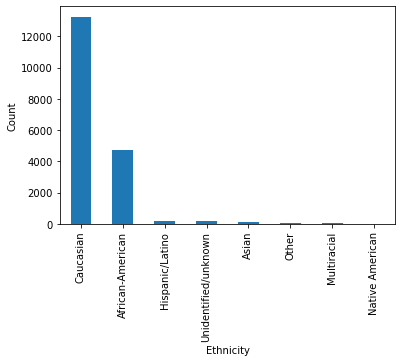

In [12]:
ethnicity_df.groupby(['CRISIS Demographics - Ethnicity'])['CRISIS Demographics - Gender Identity'].count().sort_values(ascending=False).plot.bar(sns.color_palette("viridis", as_cmap=True),legend=None, tick_label='Plain')
plt.ylabel('Count')
plt.xlabel('Ethnicity')

In [13]:
#ethnicity_df = ethnicity_df.groupby(['CRISIS Demographics - Ethnicity', 'CRISIS Demographics - Gender Identity'])['CallReportNum'].count().sort_values(ascending=False)



In [14]:
#ethnicityTop10_df = ethnicity_df.head(10)

Text(0.5, 0, 'Count')

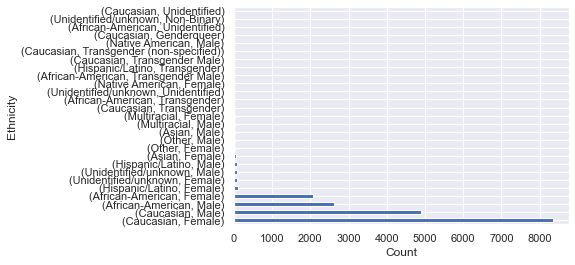

In [22]:
ethnicity_df.groupby(['CRISIS Demographics - Ethnicity', 'CRISIS Demographics - Gender Identity'])['CallReportNum'].count().sort_values(ascending=False).plot.barh(sns.color_palette("viridis", as_cmap=True),legend=None, tick_label='Plain')
plt.ylabel('Ethnicity')
#plt.xticks(rotation = 75)
plt.xlabel('Count')

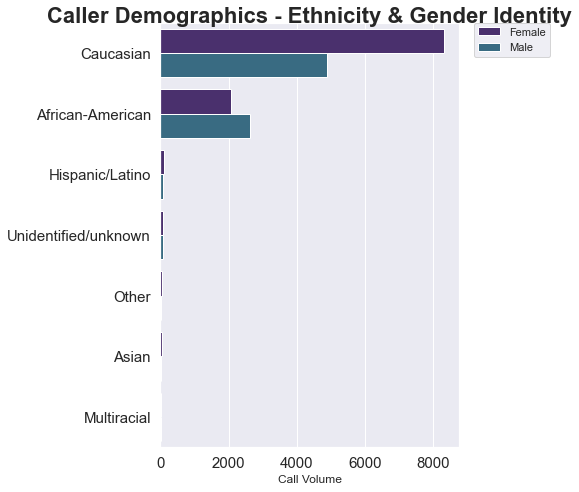

In [38]:
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(8,7)})
eth_order=['Caucasian', 'African-American', 'Hispanic/Latino', 'Unidentified/unknown', 'Other', 'Asian', 'Multiracial']
eth_palette=['#482677FF', '#2D708EFF']
sns.set_palette(palette=eth_palette)
sns.countplot(y='CRISIS Demographics - Ethnicity', data=ethnicity_df, hue='CRISIS Demographics - Gender Identity', hue_order=['Female', 'Male'], order=eth_order)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#plt.Axes.axes.barplot(width=5)
#plt.xticks(rotation=70)
plt.xlabel('Call Volume')
plt.ylabel(None)
#plt.legend(loc='best', frameon=True, fontsize=12)
plt.title("Caller Demographics - Ethnicity & Gender Identity",fontdict= { 'fontsize': 22, 'fontweight':'bold','verticalalignment': 'center'})
plt.tick_params(axis='both', which='major', labelsize=15);
plt.tight_layout()
plt.savefig('Ethnicity Chart')
plt.show();

In [30]:
newEthnicity_df = ethnicity_df.groupby(['CRISIS Demographics - Ethnicity', 'CRISIS Demographics - Gender Identity'])['CallReportNum'].count().sort_values(ascending=False)
ethnicityTop10_df = ethnicityTop10_df.head(10)
ethnicityTop10_df.head(10)


,CallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,CallersFeedback,CRISIS Demographics - Date of Birth,CRISIS Demographics - Exact Age,CRISIS Demographics - Occupation,CRISIS Demographics - Suffix,...,CRISIS Demographics - Ethnicity,CRISIS Demographics - Gender Identity,CRISIS Demographics - Goal 5 Progress,CRISIS Demographics - Has a disability?,CRISIS Demographics - Homeless?,CRISIS Demographics - Income,CRISIS Demographics - Is working?,CRISIS Demographics - Marital Status,CRISIS Demographics - Military,CRISIS Demographics - Was the outcome of this call Successful or Unsuccessful?
2,96626654,12/31/2021 23:07,12/31/2021 23:28,21,1030262,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,Yes,No,NaN,NaN,Single,N/A (did not serve),NaN
3,96626370,12/31/2021 22:45,12/31/2021 22:55,10,2479348,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,Yes,No,NaN,NaN,Divorced,N/A (did not serve),NaN
6,96625344,12/31/2021 21:40,12/31/2021 22:01,21,2003009,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,NaN,NaN,PT employment,NaN,Single,Unknown,NaN
7,96625140,12/31/2021 21:27,12/31/2021 21:39,12,1033478,NaN,NaN,NaN,NaN,NaN,...,African-American,Male,NaN,Yes,No,NaN,NaN,Single,Veteran,NaN
9,96624680,12/31/2021 21:02,12/31/2021 21:23,21,4738962,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Male,NaN,NaN,NaN,NaN,NaN,NaN,N/A (did not serve),NaN
10,96624371,12/31/2021 20:40,12/31/2021 20:50,10,-1,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
11,96624091,12/31/2021 20:20,12/31/2021 20:40,20,-1,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
12,96623850,12/31/2021 20:10,12/31/2021 20:20,10,1802329,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,Yes,No,SSDI,NaN,Single,Unknown,NaN
18,96621202,12/31/2021 18:00,12/31/2021 18:20,20,1030301,NaN,NaN,NaN,NaN,NaN,...,African-American,Male,NaN,Yes,NaN,NaN,NaN,Single,Unknown,NaN
21,96619732,12/31/2021 17:03,12/31/2021 17:18,15,3346390,NaN,NaN,NaN,NaN,NaN,...,African-American,Female,NaN,Yes,No,SSDI,NaN,Single,N/A (did not serve),NaN


In [31]:
newEthnicity_df=pd.DataFrame(ethnicityTop10_df)

In [32]:
newEthnicity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 2 to 21
Data columns (total 22 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   CallReportNum                                                                   10 non-null     int64  
 1   CallDateAndTimeStart                                                            10 non-null     object 
 2   CallDateAndTimeEnd                                                              10 non-null     object 
 3   CallLength                                                                      10 non-null     int64  
 4   CallerNum                                                                       10 non-null     int64  
 5   CallersFeedback                                                                 0 non-null      object 
 6   CRISIS Demographics 

ax = ethnicityTop10_df.plot(kind='bar', figsize=(7, 8), cmap='viridis', rot=0, width=.8)
plt.xticks(rotation=90)
plt.tight_layout()
ax.set_xlabel(xlabel='Ethnicity', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()


In [16]:
ethnicity_df[ethnicity_df['CallReportNum'] == 1].sort_values('CRISIS Demographics - Ethnicity')['CRISIS Demographics - Gender Identity'].head(10)

Series([], Name: CRISIS Demographics - Gender Identity, dtype: object)

ethnicity_df.groupby(['CallReportNum'])['CRISIS Demographics - Ethnicity'].count().sort_values(ascending=False).plot.bar(sns.color_palette("viridis", as_cmap=True),legend=None, tick_label='Plain')
plt.ylabel('ethnicity')
plt.xlabel('count')

In [17]:
sns.set()

ValueError: cannot reindex from a duplicate axis

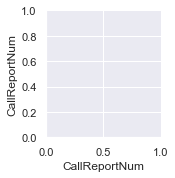

In [18]:
gender = ethnicity_df[['CRISIS Demographics - Ethnicity', 'CallReportNum', 'CRISIS Demographics - Gender Identity']]

sns.pairplot(gender)

plt.show()

In [ ]:
sns.distplot(ethnicity_df['CallReportNum'])
plt.ylabel('CRISIS Demographics - Ethnicity')
plt.title('Histogram of Ethnicity and Call count')
plt.show()

In [ ]:
corr = ethnicity_df[['CallReportNum', 'CRISIS Demographics - Ethnicity', 'CRISIS Demographics - Gender Identity', 'CallLength']].corr()
sns.heatmap(corr, annot=True)
plt.title('eth')
plt.show()

In [ ]:
ethnicity_df.groupby(['CRISIS Demographics - Ethnicity'])['CallReportNum'].count().sort_values(ascending=False).plot.bar(color='black',legend=None, tick_label='Plain')
plt.ylabel('count')
plt.xlabel('ethnicity')

In [ ]:
sns.set(style="whitegrid")
 
# loading data-set
genderneth = sns.load_dataset(SHL['CRISIS Demographics - Ethnicity', 'CRISIS Demographics - Gender Identity'])
 
# plotting strip plot with seaborn
# deciding the attributes of dataset on
# which plot should be made
ax = sns.swarmplot(x='Gender', y='Ethnicity', data=genderneth)

 
# giving title to the plot
plt.title('Gender and Ethnicity')
 
# function to show plot
plt.show()

In [ ]:
ethplt = ethnicity_df.groupby(['CRISIS Demographics - Ethnicity'])['CRISIS Demographics - Gender Identity'].count().sort_values(ascending=False).to_frame()
ethplt.reset_index(inplace=True)
ax = sns.(x=ethplt['CRISIS Demographics - Ethnicity'], y=ethplt['CRISIS Demographics - Gender Identity'], data=ethplt, palette="Greys_r", edgecolor='none')
#ax.ticklabel_format(style='plain', axis="y")
plt.xticks(rotation=65, fontsize=8, backgroundcolor='whitesmoke')
plt.ylabel('gender', fontweight='bold', fontsize=11)
plt.xlabel('ethnicity',fontweight='bold',fontsize=11, labelpad=12)